## Desafios da Primeira Aula do QuarentenaDados

- Desafio #1: mostrar os filmes que não tem nota.
- Desafio #2: mudar o nome da coluna 'avaliacao' para 'mediaAvaliacao'.
- Desafio #3: colocar o número de avaliações (total de votos) de cada filme.
- Desafio #4: arredondar as notas médias para 2 casas decimais.
- Desafio #5: descobrir os gêneros dos filmes (quais são eles, únicos).
- Desafio #6: descobrir quantos filmes tem para cada gênero.
- Desafio #7: plotar o gráfico de aparições por gênero.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Lendo dados do MovieLens

In [2]:
avaliacoes = pd.read_csv('ratings.csv')
filmes = pd.read_csv('movies.csv')

### Traduzindo as colunas dos datasets

In [3]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'avaliacao', 'momento']
filmes.columns = ['filmeId', 'titulo', 'genero']

In [4]:
avaliacoes.head()

,usuarioId,filmeId,avaliacao,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(len(avaliacoes))
print(len(filmes))
print(f'Missing: {len(avaliacoes) - len(filmes)}')

100836
9742
Missing: 91094


### Observando as características estatísticas das avaliações

In [7]:
avaliacoes.describe()

,usuarioId,filmeId,avaliacao,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Usando queries

In [8]:
avaliacoes.query('filmeId==1')

,usuarioId,filmeId,avaliacao,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Agrupando as notas médias por filme

In [9]:
avaliacoes.groupby('filmeId')['avaliacao'].mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: avaliacao, Length: 9724, dtype: float64

In [10]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].mean()

In [11]:
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Juntando as médias das notas aos seus respectivos filmes

In [12]:
filmes = filmes.join(notas_medias_por_filme, on='filmeId')

In [13]:
filmes.head()

,filmeId,titulo,genero,avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [14]:
filmes.sort_values('avaliacao')

,filmeId,titulo,genero,avaliacao
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### Desafio #1: mostrar os filmes que não tem nota.

Explicando: quando temos linhas onde uma coluna possui valores ```null``` ou `Nan` em um `Dataframe` a condição `avaliacao == avaliacao` retorna todas as linhas que
não são nulas. Logo, se a condição for `avaliacao != avaliacao` vamos ter como retorno todas as linhas que não tem avaliação.

In [15]:
filmes.query('avaliacao != avaliacao')

,filmeId,titulo,genero,avaliacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio #2: mudar o nome da coluna `avaliacao` para `mediaAvaliacao`.

In [16]:
filmes.rename(columns={'avaliacao': 'mediaAvaliacao'}, inplace=True)

# ou:
# filmes = filmes.rename(columns={'avaliacao': 'mediaAvaliacao'})

In [17]:
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio #3: colocar o número de avaliações (total de votos) de cada filme.

In [18]:
avaliacoes.groupby('filmeId')['avaliacao'].count()

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: avaliacao, Length: 9724, dtype: int64

In [19]:
total_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].count()

In [20]:
filmes = filmes.join(total_avaliacoes_por_filme, on='filmeId')

Foi necessário renomear a coluna após o join porque (i) a coluna herdou o nome da coluna avaliacao durante o agrupamento
e (ii) porque foi necessário dar um nome apropriado para a nova coluna.

Em seguida foi feito um "parser" na coluna totalAvaliacoes de `float` para `int`. Vale observar que o método `fillna()` foi utilizado
para que o método `astype()` pudesse funcionar.

In [21]:
filmes = filmes.rename(columns={'avaliacao': 'totalAvaliacoes'})

In [22]:
filmes['totalAvaliacoes'] = filmes['totalAvaliacoes'].fillna(-1).astype(int)

In [23]:
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio #4: arredondar as notas médias para 2 casas decimais.

In [24]:
decimals = 2
filmes['mediaAvaliacao'] = filmes['mediaAvaliacao'].apply(lambda x: round(x, decimals))

In [25]:
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio #5: descobrir os gêneros dos filmes (quais são eles, únicos).

Na linha 1 o argumento `expand` faz com que cada item separado por pipe seja colocado em uma coluna. Em seguida o método `melt`
faz com que os dados fiquem nas linhas e o `dropna` remove os valores nulos. Por fim, o método `unique` inibe as repetições
fazendo com que seja exibido - de forma mais amigável - todos os gêneros existents no dataset.

In [43]:
generos = filmes['genero'].str.split(pat='|', expand=True)
generos_filtrados = pd.melt(generos).dropna()
generos_filtrados.columns = ['indice', 'generos']
generos = pd.DataFrame({'generos': generos_filtrados['generos'].unique()})

In [44]:
generos

,generos
0,Adventure
1,Comedy
2,Action
3,Drama
4,Crime
5,Children
6,Mystery
7,Animation
8,Documentary
9,Thriller


### Desafio #6: descobrir quantos filmes tem para cada gênero.

In [46]:
aparicoes_por_genero = generos_filtrados.groupby('generos').count()
aparicoes_por_genero = aparicoes_por_genero.rename(columns={'indice': 'aparicoes'}).reset_index()
aparicoes_por_genero

,generos,aparicoes
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


### Desafio #7: plotar o gráfico de aparições por gênero.

<BarContainer object of 20 artists>

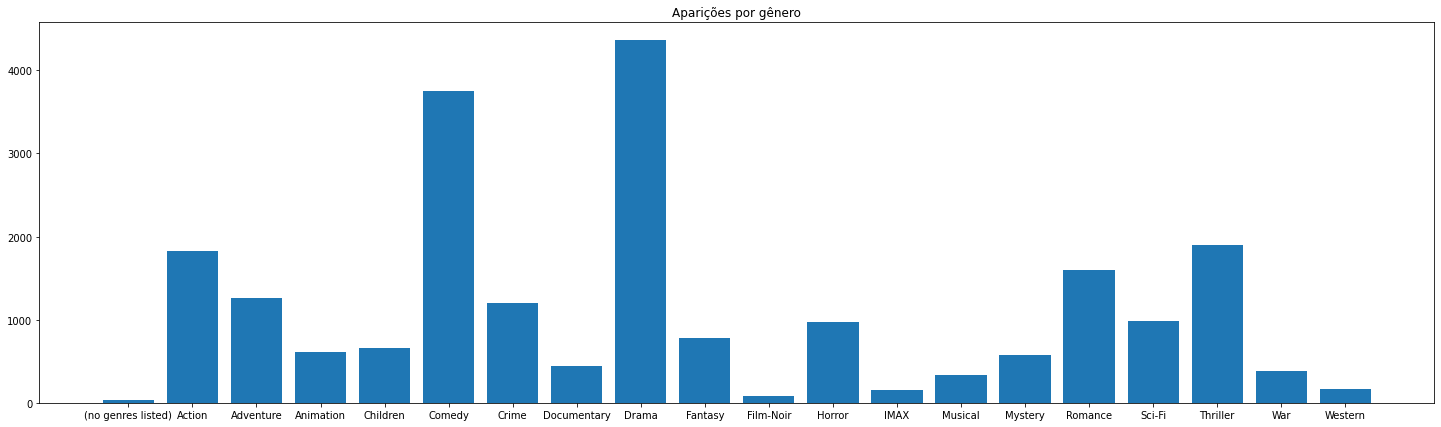

In [51]:
plt.figure(figsize=(25, 7))
plt.title('Aparições por gênero')
plt.bar(aparicoes_por_genero['generos'], aparicoes_por_genero['aparicoes'])